In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20122\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Import Main Tools


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split




In [28]:
d1 = pd.read_csv('IMDB Dataset.csv')
d2 = pd.read_csv('imdb_movies.csv')

In [29]:
d1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [30]:
d1.shape

(50000, 2)

In [31]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'differ')

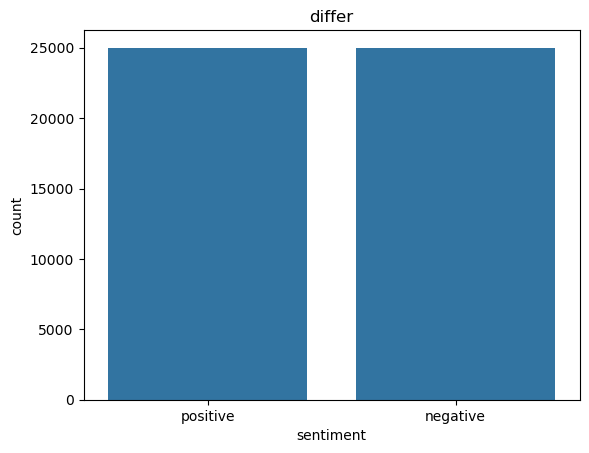

In [32]:
sns.countplot(x='sentiment',data= d1)
plt.title('differ')

In [33]:
print(d1['review'])

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object


In [34]:
def no_of_words(text):
  words = text.split()
  numofwords = len(words)
  return numofwords

In [35]:
d1['word count'] = d1['review'].apply(no_of_words)

In [36]:
d1.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [37]:
d1.loc[0]

review        One of the other reviewers has mentioned that ...
sentiment                                              positive
word count                                                  307
Name: 0, dtype: object

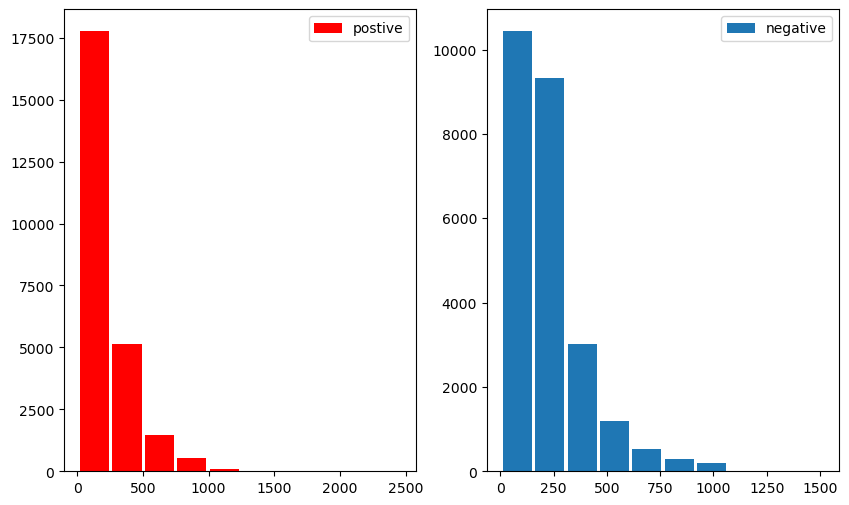

In [38]:
fig , ax = plt.subplots(1,2,figsize=(10,6))
ax[0].hist(d1[d1['sentiment']=='positive']['word count'],label='postive',color='red',rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(d1[d1['sentiment']=='negative']['word count'],label='negative',rwidth=0.9)
ax[1].legend(loc='upper right')
plt.show()

In [39]:
d1['sentiment'].replace('positive',1,inplace=True)
d1['sentiment'].replace('negative',0,inplace=True)


C:\Users\20122\AppData\Local\Temp\ipykernel_18668\2865610941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d1['sentiment'].replace('positive',1,inplace=True)
C:\Users\20122\AppData\Local\Temp\ipykernel_18668\2865610941.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [40]:
d1

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230
...,...,...,...
49995,I thought this movie did a down right good job...,1,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,112
49997,I am a Catholic taught in parochial elementary...,0,230
49998,I'm going to have to disagree with the previou...,0,212


In [41]:
def data_processing(text):
  text = text.lower()
  text = re.sub('<br />','',text)
  text = re.sub(r"https\S+|www\S+|http\S+",'',text,flags=re.MULTILINE)
  text = re.sub(r'\@w+|\#','',text)
  text = re.sub(r'[^\w\s]','',text)
  text_token=word_tokenize(text)
  Filter_text = [w for w in text_token if w not in stopwords]
  return " ".join(Filter_text)

In [42]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\20122\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [43]:
d1['review']=d1['review'].apply(data_processing)


In [44]:
print(d1['review'][0])

one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle c

In [45]:
print(d1['review'].duplicated().sum())

422


In [46]:
d1 = d1.drop_duplicates('review')

In [47]:
print(d1['review'].duplicated().sum())

0


In [48]:
d1['word count'] = d1['review'].apply(no_of_words)

C:\Users\20122\AppData\Local\Temp\ipykernel_18668\3461429976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['word count'] = d1['review'].apply(no_of_words)


In [49]:
d1['review'].loc[0]

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

In [50]:
pos_review= d1[d1['sentiment']==1]
pos_review.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


In [51]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [52]:
from wordcloud import WordCloud
import plotly.express as px

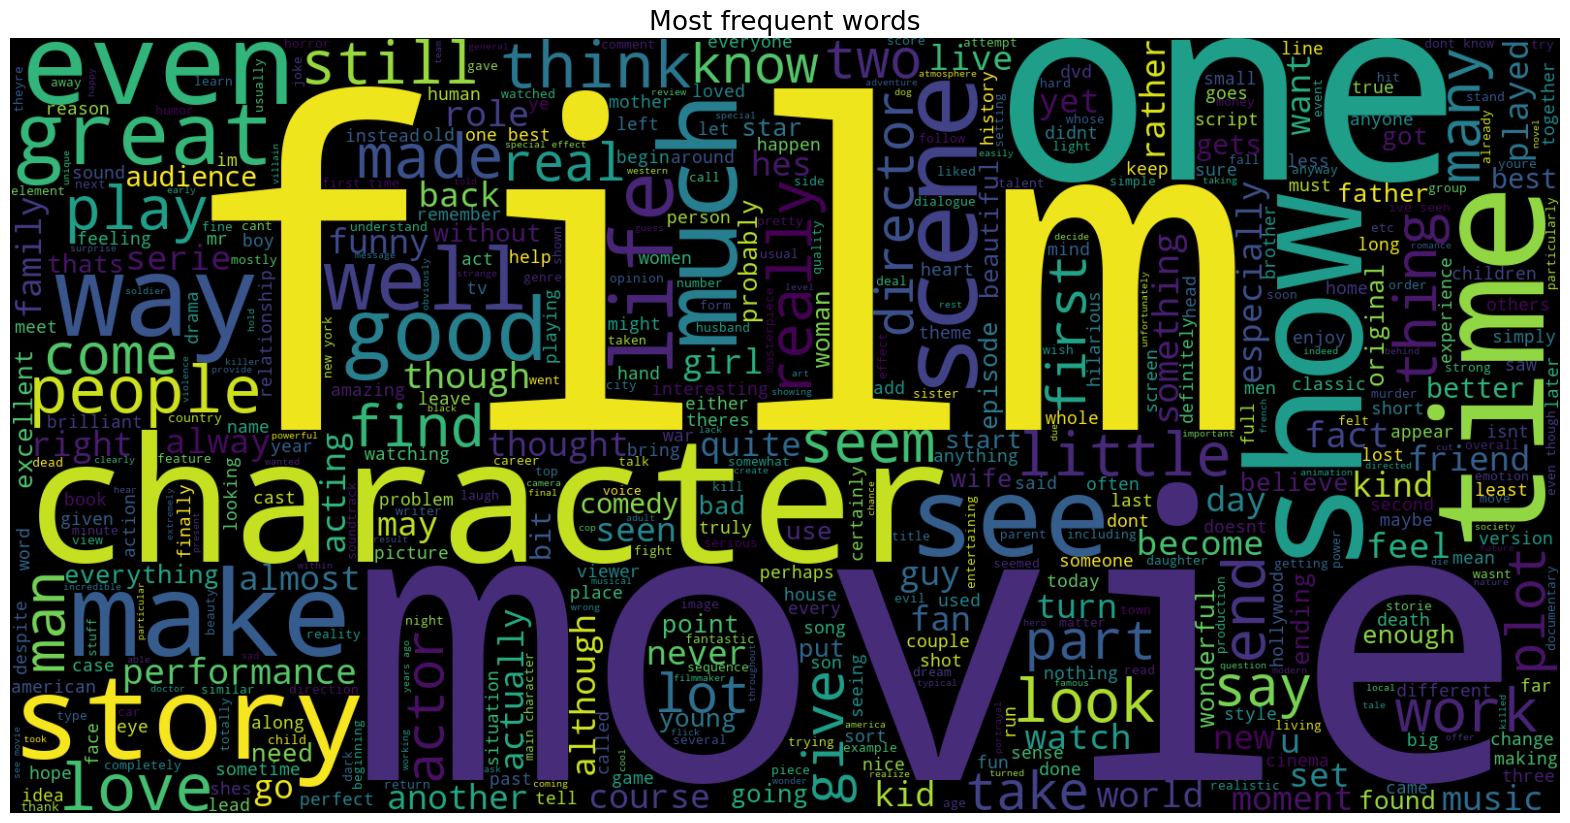

In [53]:
text=''.join([word for word in pos_review['review']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500 , width=1600 , height = 800).generate(text)
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words',fontsize = 19 )
plt.show()

In [54]:
from collections import Counter
count = Counter()
for text in pos_review['review'].values:
  for word in text.split():
    count[word]+=1
count.most_common()

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971),
 ('first', 8818),
 ('films', 8433),
 ('love', 8363),
 ('people', 8333),
 ('best', 8268),
 ('get', 8151),
 ('way', 7524),
 ('many', 7488),
 ('life', 7340),
 ('characters', 7146),
 ('think', 7091),
 ('movies', 7058),
 ('made', 6966),
 ('two', 6845),
 ('dont', 6573),
 ('seen', 6572),
 ('watch', 6422),
 ('character', 6418),
 ('show', 6373),
 ('little', 6367),
 ('make', 6271),
 ('still', 6257),
 ('never', 6244),
 ('could', 6083),
 ('man', 5876),
 ('know', 5634),
 ('years', 5293),
 ('ever', 5225),
 ('end', 5043),
 ('scene', 4940),
 ('real', 4852),
 ('say', 4775),
 ('back', 4722),
 ('scenes', 4713),
 ('makes', 4672),
 ('acting', 4599),
 ('new', 4571),
 ('better', 4542),
 ('go', 4527),
 ('plot', 4505),
 ('us', 4502),
 ('find',

In [55]:
poss_words = pd.DataFrame(count.most_common(15))
poss_words.columns = ['word','count']
poss_words

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281
5,great,12568
6,story,12338
7,see,11814
8,time,11724
9,well,10930


In [56]:
px.bar(poss_words,x='count',y='word',title='common words in postive')

In [57]:
x= d1['review']
y=d1['sentiment']


In [58]:
vect = TfidfVectorizer()
x= vect.fit_transform(d1['review'])

In [59]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [60]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(34704, 221707)
(14874, 221707)
(34704,)
(14874,)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [62]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred=logreg.predict(x_test)
logreg_acc= accuracy_score(logreg_pred,y_test)
print(logreg_acc*100)

89.0614495092107


In [63]:
print(confusion_matrix(y_test,logreg_pred))
print(classification_report(y_test,logreg_pred))

[[6457  904]
 [ 723 6790]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.88      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [64]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
mnb_pred=mnb.predict(x_test)
mnb_acc= accuracy_score(mnb_pred,y_test)
print(mnb_acc*100)

86.43942449912599


In [65]:
print(confusion_matrix(y_test,mnb_pred))
print(classification_report(y_test,mnb_pred))

[[6418  943]
 [1074 6439]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7361
           1       0.87      0.86      0.86      7513

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [66]:
svc = LinearSVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
svc_acc= accuracy_score(svc_pred,y_test)
print(svc_acc*100)

89.21608175339519


In [67]:
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

[[6504  857]
 [ 747 6766]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [68]:
import joblib

# Save best model (say, 'model' is your trained classifier)
joblib.dump(svc, 'sentiment_model.pkl')

# Save vectorizer if you used CountVectorizer or TfidfVectorizer
joblib.dump(vect, 'vectorizer.pkl')

['vectorizer.pkl']

In [69]:
import joblib

# Load model and vectorizer
model = joblib.load('sentiment_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

def predict_sentiment(text):
    text_vec = vectorizer.transform([text])
    prediction = model.predict(text_vec)[0]
    return "Positive" if prediction == 1 else "Negative"

In [70]:
if __name__ == "__main__":
    review = input("Enter your movie review: ")
    result = predict_sentiment(review)
    print(f"Sentiment: {result}")

Sentiment: Positive
